# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="attachment:ai_eval_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

random_state = 42

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

In [ ]:
digits = datasets.load_digits()
n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

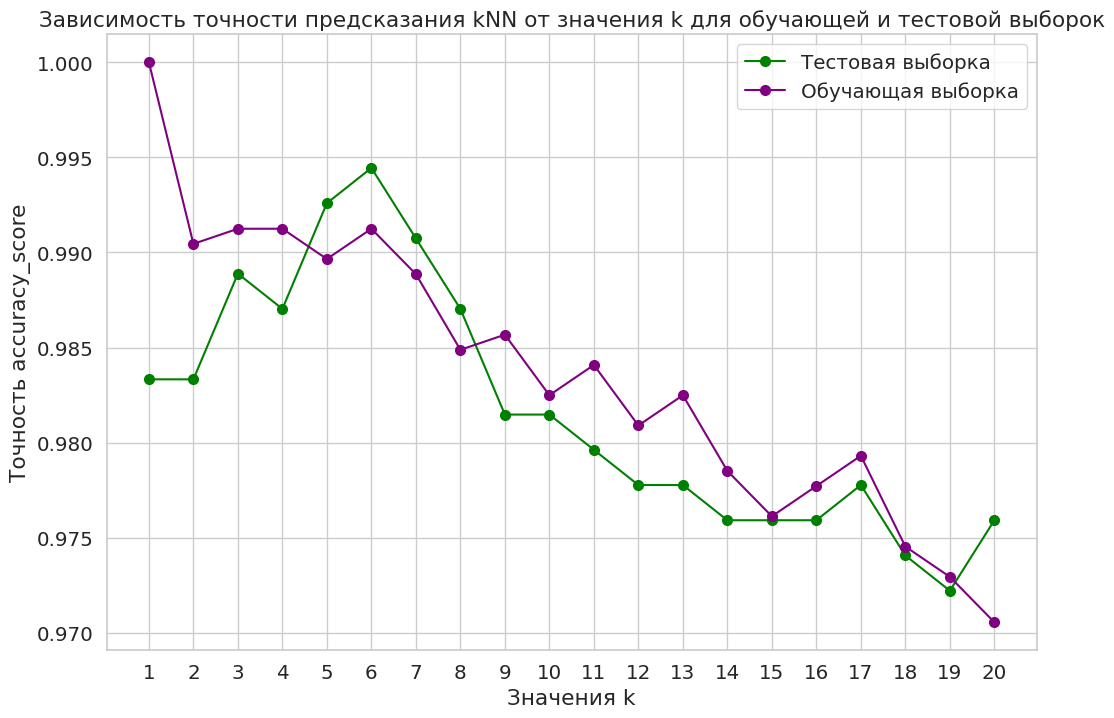

In [ ]:
train_accuracy = []
test_accuracy = []

for k in range(1, 21):
    # Создание модели KNN для k соседей
    knn = KNeighborsClassifier(n_neighbors = k)
    # Обучение модели на тренировочных данных
    knn.fit(X_train, y_train)
    # Прогнозирование на данных
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    # Оценка точности модели
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)

k = range(1, 21)
plt.figure(figsize=(12, 8))
plt.title('Зависимость точности предсказания kNN от значения k для обучающей и тестовой выборок')
plt.xlabel('Значения k')
plt.ylabel('Точность accuracy_score')
plt.plot(k, test_accuracy, label='Тестовая выборка', marker='o', color='green', markersize=7)
plt.plot(k, train_accuracy, label='Обучающая выборка', marker='o', color='purple', markersize=7)
plt.xticks(k)
plt.legend()
plt.grid(True)
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** при k = 1 единственный сосед - это и есть сама наша точка

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

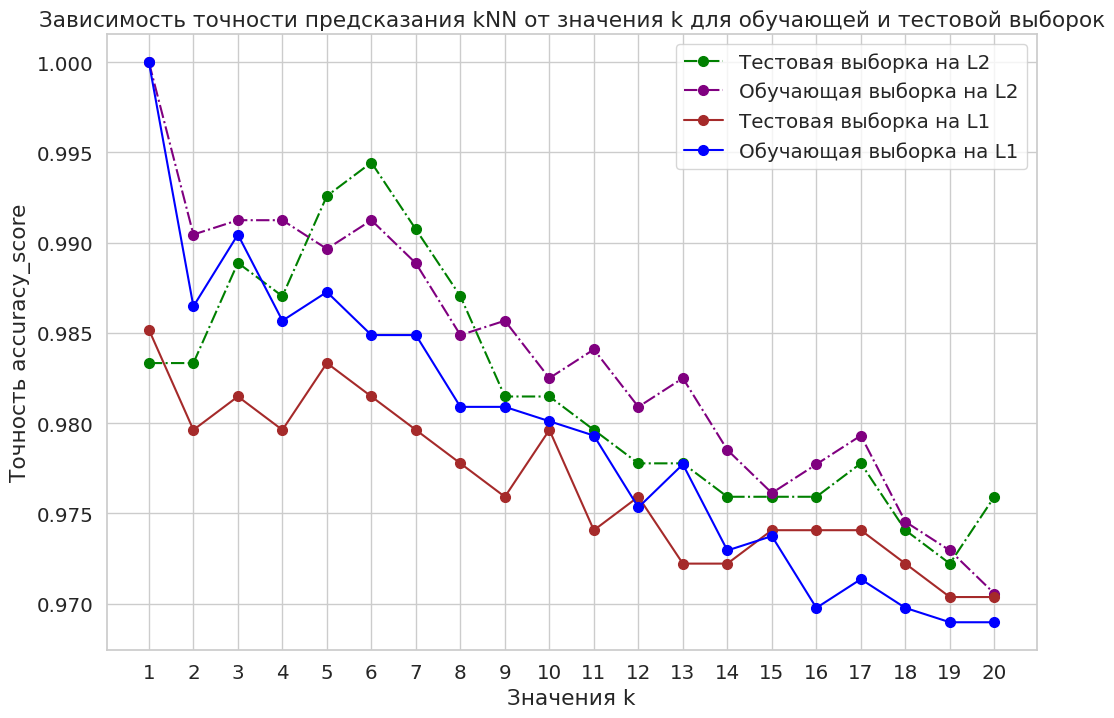

In [ ]:
train_accuracy1 = []
test_accuracy1 = []

for k in range(1, 21):
    # Создание модели KNN для k соседей
    knn1 = KNeighborsClassifier(n_neighbors = k, metric='manhattan')
    # Обучение модели на тренировочных данных
    knn1.fit(X_train, y_train)
    # Прогнозирование на данных
    y_pred_test1 = knn1.predict(X_test)
    y_pred_train1 = knn1.predict(X_train)
    # Оценка точности модели
    accuracy_test1 = accuracy_score(y_test, y_pred_test1)
    accuracy_train1 = accuracy_score(y_train, y_pred_train1)

    train_accuracy1.append(accuracy_train1)
    test_accuracy1.append(accuracy_test1)

k = range(1, 21)
plt.figure(figsize=(12, 8))
plt.title('Зависимость точности предсказания kNN от значения k для обучающей и тестовой выборок')
plt.xlabel('Значения k')
plt.ylabel('Точность accuracy_score')
plt.plot(k, test_accuracy, label='Тестовая выборка на L2', marker='o', color='green', markersize=7, linestyle='-.')
plt.plot(k, train_accuracy, label='Обучающая выборка на L2', marker='o', color='purple', markersize=7, linestyle='-.')
plt.plot(k, test_accuracy1, label='Тестовая выборка на L1', marker='o', color='brown', markersize=7)
plt.plot(k, train_accuracy1, label='Обучающая выборка на L1', marker='o', color='blue', markersize=7)
plt.xticks(k)
plt.legend()
plt.grid(True)
plt.show()

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** Метрика определяет, как мы измеряем расстояния и углы, поэтому ближайшими соседями могут стать другие точки, из-за чего характер кривых поменяется.

**Выводы:**
1. Выбор k(число соседей) важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.
2. От выбора метрики зависит качество модели. Евклидова метрика(L2) сделала модель более качественной и точной, чем Манхэттенская(L1).

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [ ]:
titanic = pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [ ]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [ ]:
X.isnull().any(axis=1).sum()
X = X.dropna()
y = y[X.index]

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

In [ ]:
X_train["Survived"] = y_train

def calculate_survival(titanic, feature):
    survival = titanic.groupby(feature)["Survived"].mean() * 100
    death = 100 - survival
    return pd.DataFrame({
        "Выжили": survival,
        "Погибли": death
    })

translate = {
    "Sex": "Пол",
    "Pclass": "Класс",
    "Parch": "Количество родителей и детей",
    "SibSp": "Количество братьев и сестёр",
    "Age": "Возраст",
    "Fare": "Плата",
}

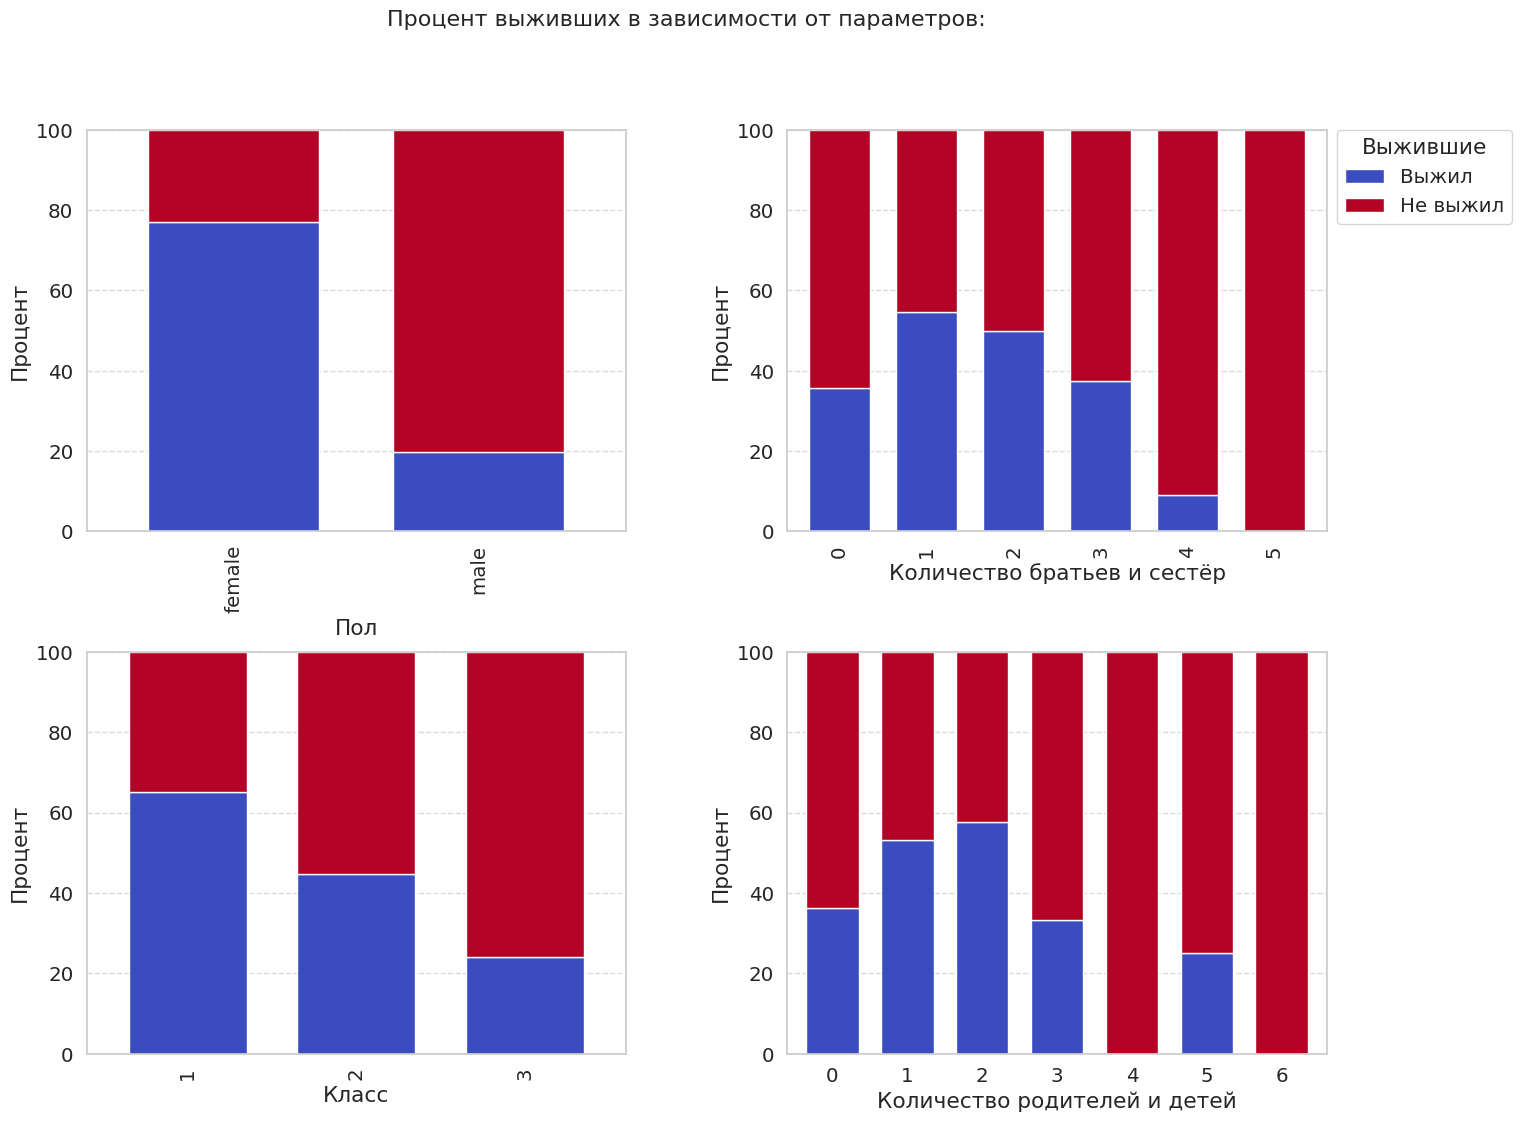

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, feature in enumerate(["Sex", "SibSp", "Pclass", "Parch"]):
    curr_plot = calculate_survival(X_train, feature).plot(
        kind="bar",
        stacked=True,
        ax=axs[i // 2, i % 2],
        colormap="coolwarm",
        width=0.7
    )
    axs[i // 2, i % 2].set_ylabel("Процент")
    axs[i // 2, i % 2].set_xlabel(translate[feature])
    axs[i // 2, i % 2].set_ylim(0, 100)
    axs[i // 2, i % 2].get_legend().remove()
    axs[i // 2, i % 2].grid(axis="y", linestyle="--", alpha=0.7)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.xticks(rotation=0)
plt.legend(
    title="Выжившие",
    labels=["Выжил", "Не выжил"],
    loc="upper left",
    bbox_to_anchor=(1, 2.324)
)

fig.suptitle("Процент выживших в зависимости от параметров:", fontsize=16)
plt.show()

<ipython-input-189-b012bffa3439>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival = titanic.groupby(feature)["Survived"].mean() * 100


<Figure size 1600x1000 with 0 Axes>

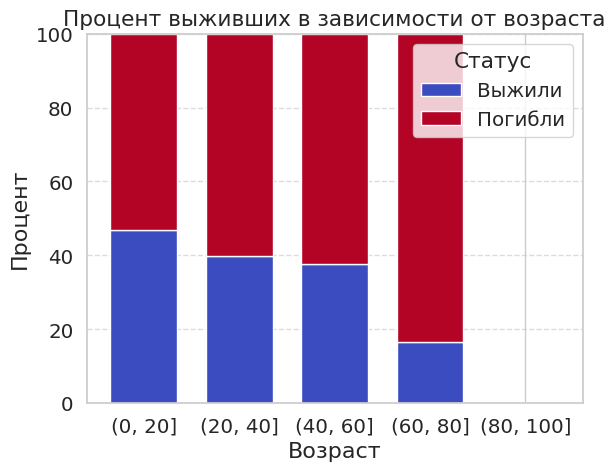

In [ ]:
bins = [0, 20, 40, 60, 80, 100]

X_train["AgeGroup"] = pd.cut(X_train["Age"], bins=bins)

plt.figure(figsize=(16, 10))
calculate_survival(X_train, "AgeGroup").plot(kind="bar", stacked=True, colormap="coolwarm", width=0.7)
plt.title("Процент выживших в зависимости от возраста")
plt.xlabel("Возраст", fontsize=16)
plt.ylabel("Процент", fontsize=16)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title="Статус", loc="upper right")
plt.show()

<ipython-input-189-b012bffa3439>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival = titanic.groupby(feature)["Survived"].mean() * 100


<Figure size 1600x1000 with 0 Axes>

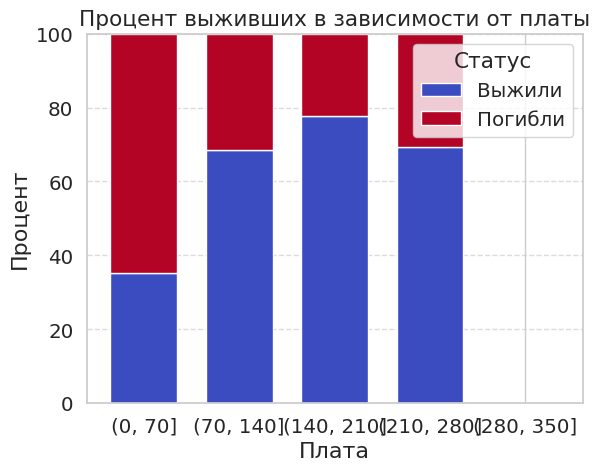

In [ ]:
bins = [0, 70, 140, 210, 280, 350]

X_train["FareGroup"] = pd.cut(X_train["Fare"], bins=bins)

plt.figure(figsize=(16, 10))
calculate_survival(X_train, "FareGroup").plot(kind="bar", stacked=True, colormap="coolwarm", width=0.7)
plt.title("Процент выживших в зависимости от платы")
plt.xlabel("Плата", fontsize=16)
plt.ylabel("Процент", fontsize=16)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title="Статус", loc="upper right")
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

1. Если человек на борту - женщина, то он выживает.

Сначала спасали женщин, поэтому статистика показывает, что женщина выживает гораздо вероятнее, чем мужчина.

2. Если человек на борту - мужчина и он взял билет класса номер 1, то он выживает.

По графикам видно, что большинство людей из 1 класса выжили, причём процент их больше процента выживших из других классов.

**Дерево 2:**

 1. Если возраст человека меньше 15, то он выживает.

 Сначала спасали детей, поэтому статистика показывает, что люди с возрастом меньше 15 лет в процентном соотношении вероятнее выживают.

Реализуйте полученные деревья по шаблону

In [ ]:
def tree1(features: pd.DataFrame) -> pd.Series:
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    """

    predicted = pd.Series(0, index=features.index)
    predicted[features["Sex"] == "female"] = 1
    predicted[(features["Sex"] == "male") & (features["Pclass"] == 1)] = 1

    return predicted

In [ ]:
def tree2(features: pd.DataFrame) -> pd.Series:
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    """

    predicted = pd.Series(0, index=features.index)
    predicted[features["Age"] < 15] = 1

    return predicted

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [ ]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """

    return (target == predicted).mean()

In [ ]:
preds1 = tree1(X_test)
accuracy1 = accuracy(y_test, preds1)
print("Точность у 1 дерева:", accuracy1)

preds2 = tree2(X_test)
accuracy2 = accuracy(y_test, preds2)
print("Точность у 2 дерева:", accuracy2)

Точность у 1 дерева: 0.7348837209302326
Точность у 2 дерева: 0.586046511627907


Вывод:
1. Точность 1 дерева больше. То есть предсказание на основе пола пассажира и класса обслуживания точнее, чем только на основе возраста.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:**
Проблемы с признаками SibSp и Parch:
1. SibSp и Parch взаимосвязаны, так как пассажиры с большим количеством братьев/сестер могут также иметь большее количество родителей/детей на борту. Это может негативно сказаться на качестве модели.
2. Неравномерное распределение данных по этим признакам. Чаще встречаются пассажиры с меньшим количеством братьев/сестёр, что может плохо отразиться на общей картине, так как статистика по редким случаям неполная.

Проблем с Pclass меньше, так как здесь достаточно равномерное распределение по 3 классам обсуживания, благодаря чему модель будет корректно обучаться.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




In [ ]:
features = ["Pclass", "Age", "Sex", "Fare"]
target = "Survived"

X = titanic[features]
y = titanic[target]

X = X.dropna()
y = y[X.index]
X["Sex"] = X["Sex"].map({"male": 1, "female": 0})
# делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_knn = accuracy(y_test, y_pred)
print("Точность kNN: ", accuracy_knn)

Точность kNN:  0.6930232558139535


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [ ]:
for i in features:
  print(i)
  print('Максимальное значение:', X_train[i].max())
  print('Минимальное значение:', X_train[i].min(), "\n")

Pclass
Максимальное значение: 3
Минимальное значение: 1 

Age
Максимальное значение: 80.0
Минимальное значение: 0.67 

Sex
Максимальное значение: 1
Минимальное значение: 0 

Fare
Максимальное значение: 263.0
Минимальное значение: 0.0 



Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  Fare вносит больший вклад из-за большего распределения(от 0 до 263), а Sex вносит меньший вклад(от 0 до 1), хотя в реальности пол людей больше влиял на само выживание(женщины вероятнее выживали). Поэтому это может негативно влиять на kNN, уменьшая точность результата.


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** из-за выбросов масштабирование, может быть неточным, так как если большая часть точек сконцентрируется около одного значения, то значение будет смещённым.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normal = MinMaxScaler()
X_train_normal = normal.fit_transform(X_train)
X_test_normal = normal.transform(X_test)
X_train_normal = pd.DataFrame(X_train_normal, columns=X_train.columns)
X_test_normal = pd.DataFrame(X_test_normal, columns=X_test.columns)
X_train_normal

,Pclass,Age,Sex,Fare
0,1.0,0.256271,1.0,0.030608
1,0.5,0.054582,0.0,0.105513
2,1.0,0.350813,1.0,0.027487
3,1.0,0.735283,1.0,0.027567
4,0.0,0.495777,1.0,0.117871
...,...,...,...,...
494,0.0,0.571411,1.0,0.232605
495,0.5,0.306694,1.0,0.049430
496,0.0,0.508383,0.0,0.511407
497,1.0,0.407538,1.0,0.078042


Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [ ]:
for i in features:
  print(i)
  print('Максимальное значение:', X_train_normal[i].max())
  print('Минимальное значение:', X_train_normal[i].min(), "\n")

Pclass
Максимальное значение: 1.0
Минимальное значение: 0.0 

Age
Максимальное значение: 1.0
Минимальное значение: 0.0 

Sex
Максимальное значение: 1.0
Минимальное значение: 0.0 

Fare
Максимальное значение: 1.0
Минимальное значение: 0.0 



Обучите модель и сравните результат предсказаний со стандартизацией и без.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_normal, y_train)
y_pred = knn.predict(X_test_normal)
accuracy_knn = accuracy(y_test, y_pred)
print("Точность kNN: ", accuracy_knn)

Точность kNN:  0.7534883720930232


**Вывод:** Точность возросла с 69 процентов до 75 процентов. Поэтому нормирование улучшает качество модели.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

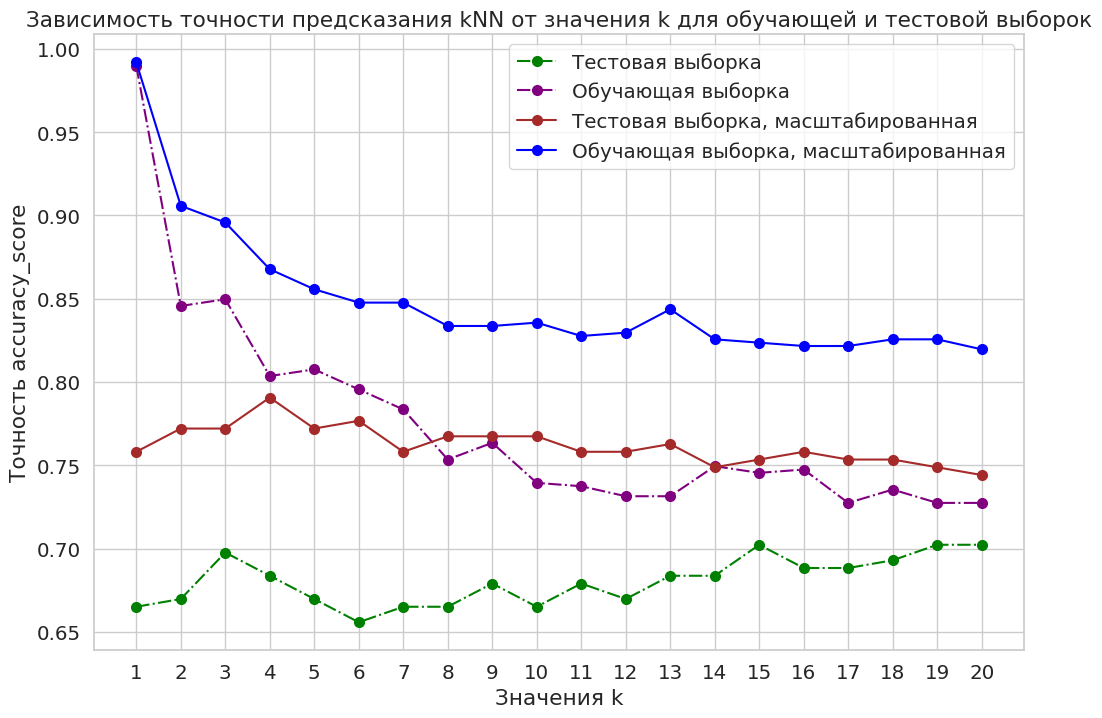

In [ ]:
train_accuracy = []
test_accuracy = []
train_accuracy_normal = []
test_accuracy_normal = []

for k in range(1, 21):
    # Создание модели KNN для k соседей
    knn = KNeighborsClassifier(n_neighbors = k)
    # Обучение модели на тренировочных данных
    knn.fit(X_train, y_train)
    # Прогнозирование на данных
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    # Оценка точности модели
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)

    # Создание модели KNN для k соседей
    knn_normal = KNeighborsClassifier(n_neighbors = k)
    # Обучение модели на тренировочных данных
    knn_normal.fit(X_train_normal, y_train)
    # Прогнозирование на данных
    y_pred_test_normal = knn_normal.predict(X_test_normal)
    y_pred_train_normal = knn_normal.predict(X_train_normal)
    # Оценка точности модели
    accuracy_test_normal = accuracy_score(y_test, y_pred_test_normal)
    accuracy_train_normal = accuracy_score(y_train, y_pred_train_normal)

    train_accuracy_normal.append(accuracy_train_normal)
    test_accuracy_normal.append(accuracy_test_normal)

k = range(1, 21)
plt.figure(figsize=(12, 8))
plt.title('Зависимость точности предсказания kNN от значения k для обучающей и тестовой выборок')
plt.xlabel('Значения k')
plt.ylabel('Точность accuracy_score')
plt.plot(k, test_accuracy, label='Тестовая выборка', marker='o', color='green', markersize=7, linestyle='-.')
plt.plot(k, train_accuracy, label='Обучающая выборка', marker='o', color='purple', markersize=7, linestyle='-.')
plt.plot(k, test_accuracy_normal, label='Тестовая выборка, масштабированная', marker='o', color='brown', markersize=7)
plt.plot(k, train_accuracy_normal, label='Обучающая выборка, масштабированная', marker='o', color='blue', markersize=7)
plt.xticks(k)
plt.legend()
plt.grid(True)
plt.show()

**Вывод:**
1. точность масштабированной обучающей выборки выше, чем немасштабированной.
2. точность масштабированной тестовой выборки выше, чем немасштабированной, поэтому можно сделать вывод, что модель обучилась лучше при нормализации данных.
3. дерево глубины 1 дало результаты гораздно меньшей точности, чем kNN, из чего можно сделать вывод, что сравнение по одному признаку не результативно.
4. дерево глубины 2 дало примерно такую же точность, что и масштабированный kNN, поэтому можно сделать вывод, что показатели пола и класса обслуживания людей играли большую роль при выживании.